# Currently contains boxcox transofrmations on continous data and some simple PCA calculations


## 1. Initializing data

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional


In [1]:


import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


dataset = pd.read_csv('energydata_complete.csv')
#Data = np.loadtxt(open("ProjectdataNotime.csv", "rb"), delimiter=",", skiprows=1)


In [2]:
dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


## Transforming the data

In [3]:
# Boxcox transformations on the least normal datasets: Manually chosen.
dataset['T2'] = stats.boxcox(dataset['T2'], -1)
dataset['RH_3'] = stats.boxcox(dataset['RH_3'], 1)
dataset['RH_4'] = stats.boxcox(dataset['RH_4'], -1)
dataset['T5'] = stats.boxcox(dataset['T5'], -1)
dataset['RH_5'] = stats.boxcox(dataset['RH_5'], -1)
dataset['T6'] = stats.boxcox(dataset['T6']+10, 0.5)
dataset['RH_9'] = stats.boxcox(dataset['RH_9'], -0.5)
dataset['T_out'] = stats.boxcox(dataset['T_out']+10, 0.5)

In [4]:
X_cont = dataset.iloc[:, 3:-2].values # the continous datatypes 
Y = dataset.iloc[:,0:2].values # the other data (discrete and label)

## 2.1 Standardizing continous variables

In [5]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()

In [6]:
# 
#X_ctrain = sc_X.fit_transform(X_ctrain)
#X_ctest = sc_X.transform(X_ctest)

# Code Something: Initial PCA's

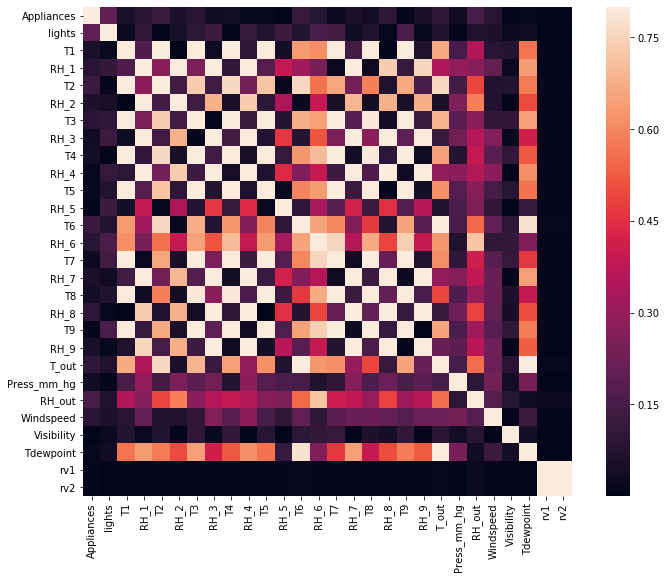

In [7]:
corrmat = dataset.corr()
f, ax = pl.subplots(figsize=(12, 9))
sns.heatmap(np.abs(corrmat), vmax=.8, square=True); # Creates a map of the correlations of the data ()

## PCA on temperatures

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc_T=StandardScaler()
##Seeing that the multitude of temperatures bring very littnle variance:
Tempmat = [dataset['T1'].values,
           dataset['T2'].values,
           dataset['T3'].values,
           dataset['T4'].values,
           dataset['T5'].values,
           dataset['T6'].values,
           dataset['T7'].values,
           dataset['T8'].values,
           dataset['T9'].values]
Tempmat=sc_T.fit_transform(Tempmat)

In [10]:
pca_temp = PCA(n_components=2)
pca_temp.fit(Tempmat)
a1=pca_temp.explained_variance_ratio_
b1=pca_temp.components_

In [11]:
a1

array([0.99423491, 0.00198365])

## PCA on humidity

In [12]:
from sklearn.decomposition import PCA
sc_H=StandardScaler()
##Seeing that the multitude of temperatures bring very littnle variance:
Hummat = [dataset['RH_1'].values,
           dataset['RH_2'].values,
           dataset['RH_3'].values,
           dataset['RH_4'].values,
           dataset['RH_5'].values,
           dataset['RH_6'].values,
           dataset['RH_7'].values,
           dataset['RH_8'].values,
           dataset['RH_9'].values]
Hummat=sc_H.fit_transform(Hummat)

In [13]:
pca_hum = PCA(n_components=2)
pca_hum.fit(Tempmat)
a2=pca_hum.explained_variance_ratio_
b2=pca_hum.components_

In [14]:
a2

array([0.99423491, 0.00198365])

## Can you do both? 

In [15]:
Combmat= [dataset['T1'].values,
           dataset['T2'].values,
           dataset['T3'].values,
           dataset['T4'].values,
           dataset['T5'].values,
           dataset['T6'].values,
           dataset['T7'].values,
           dataset['T8'].values,
           dataset['T9'].values,
           dataset['RH_1'].values,
           dataset['RH_2'].values,
           dataset['RH_3'].values,
           dataset['RH_4'].values,
           dataset['RH_5'].values,
           dataset['RH_6'].values,
           dataset['RH_7'].values,
           dataset['RH_8'].values,
           dataset['RH_9'].values]
pca_comb = PCA(n_components=2)
pca_comb.fit(Combmat)
a3=pca_comb.explained_variance_ratio_
b3=pca_comb.components_

In [16]:
a3

array([0.88959093, 0.10466533])

In [28]:
pca_all = PCA(n_components=9)
pca_all.fit(dataset.iloc[:, 3:-2].values)
a=pca_all.explained_variance_ratio_
b=pca_all.components_

0.9950260655548501